**GITHUB**
(https://github.com/tushii2000)

**LINKEDIN**
(https://www.linkedin.com/in/tushar-singh-b1b656206/)


In [910]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from wordcloud import WordCloud

# Read File

In [913]:
df = pd.read_csv('/content/ netflix_titles_2021.csv')

In [915]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [922]:
import pandas as pd

# Count occurrences of each type
type_counts = df['type'].value_counts()

# Calculate the total count
total_count = type_counts.sum()

# Concatenate type_counts with total count
type_counts_with_total = pd.concat([type_counts, pd.Series({'Total': total_count})])

# Convert to DataFrame and transpose
type_counts_df = pd.DataFrame(type_counts_with_total, columns=['Count']).T

# Print the DataFrame
type_counts_df


,Movie,TV Show,Total
Count,6131,2676,8807


In [864]:
wordcloud_df=df.copy()

Data Dictionary

In [865]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [866]:
df['date_added'] = pd.to_datetime(df['date_added'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


# Miss matched data

In [867]:
df.loc[df['director'] == 'Louis C.K.' , 'duration'] = df['rating']

In [868]:
df.loc[df['director'] == 'Louis C.K.' , 'rating'] = 'null'
df[df.director == 'Louis C.K.'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,null,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,null,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,null,66 min,Movies,The comic puts his trademark hilarious/thought...


# Duration repair
In Type column we can see if Type is Movie then duration is in min and if Type is TV Show duration is in season
1. First we have to remove the string and convert it into int for further calculation
2. making seprate df for Movies and TV Shows for better compersion



In [869]:
df['duration'] = df['duration'].str.extract('(\d+)', expand=False).astype(int)

In [870]:
#country data visualization
country_df=df.copy()

In [871]:
director_df=df.copy()

# Filling empty data to NULL

In [872]:
df.fillna({'rating':'null','cast':'null', 'country': 'null', 'director':'null'}, inplace=True)
df.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

# List conversion
Director, Cast, Country, Listed_in are in object and contains more than 1 value so we have to convert them into list for extracting each element for better and clear analyse

In [873]:
def convert_to_list(string):
  lst = []
  lst = string.split(', ')
  return lst

In [874]:
df['cast'] = df['cast'].apply(convert_to_list)
df['director'] = df['director'].apply(convert_to_list)
df['country'] = df['country'].apply(convert_to_list)
df['listed_in'] = df['listed_in'].apply(convert_to_list)
df['rating'] = df['rating'].replace('unkown', 'null')
#df['title'] = df['title'].str.lower()
#df['description'] = df['description'].str.lower()
#df

#  Movie and TV Show df
Creating Seprate DF for Movies and TV Shows

In [875]:
movie_df = df[df['type'] == 'Movie']
tvshow_df = df[df['type'] == 'TV Show']

# Pie Chart

Movies and Tv show overall Distribution

<Axes: ylabel='count'>

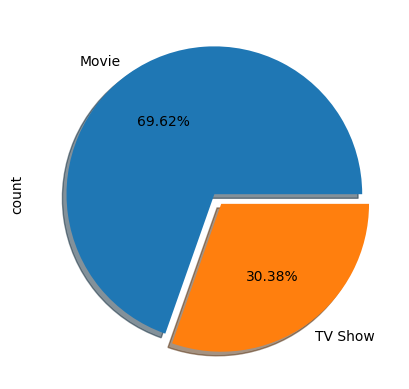

In [876]:
df["type"].value_counts().plot.pie(autopct='%1.2f%%',explode=[0,0.08], shadow = True)

# Movie Vs TV Show Vs Overall Line chart

Now we will Plot a graph for type (Movie/TV Show) along with total counts

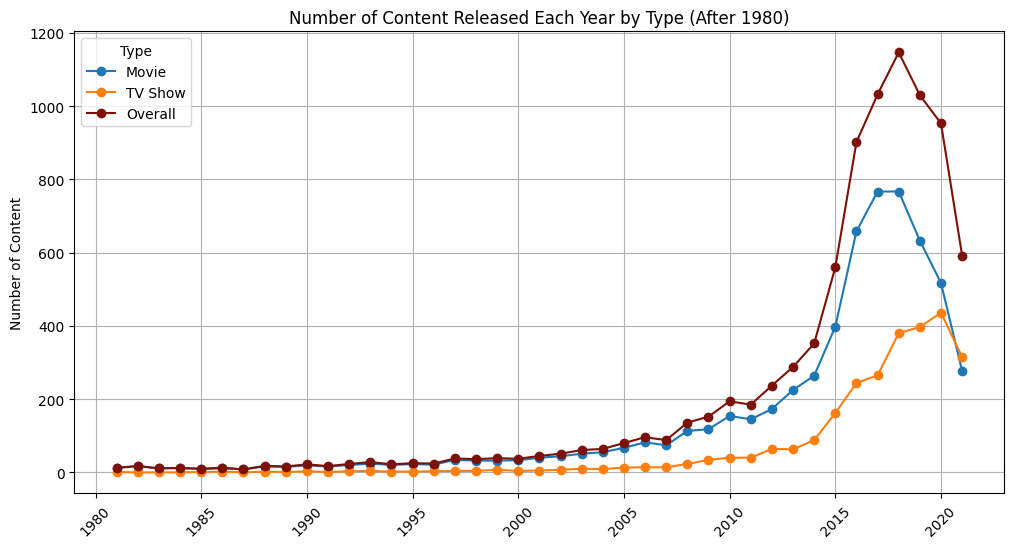

In [877]:
# Filter the DataFrame for entries with release dates after 1980
df_filtered = df[df['release_year'] > 1980]

# Group the data by release year and type, and count the number of entries
release_counts = df_filtered.groupby(['release_year', 'type']).size().unstack(fill_value=0)

# Calculate overall count for each year
overall_counts = release_counts.sum(axis=1)

# Plotting
plt.figure(figsize=(12, 6))

# Plot individual type counts
for col in release_counts.columns:
    plt.plot(release_counts.index, release_counts[col], marker='o', linestyle='-', label=col)

# Plot overall count
plt.plot(overall_counts.index, overall_counts.values, marker='o', linestyle='-', color='#7D1007', label='Overall')

plt.title('Number of Content Released Each Year by Type (After 1980)')
plt.ylabel('Number of Content')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.grid(True)
plt.show()


# Country Visual Bar Chart


Analyze the distribution of content across different country of origin

In [878]:
#making copy for future
country_df_original=country_df.copy()

In [879]:
# creating different df for country
country_df = country_df[country_df['country'] != '[null]'].copy()
country_df = country_df.dropna(subset=['country'])
country_df['country'] = country_df['country'].apply(convert_to_list)
country_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,[United States],2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",[South Africa],2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",[India],2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","[United States, Ghana, Burkina Faso, United Ki...",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",[United Kingdom],2021-09-24,2021,TV-14,9,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","[United Arab Emirates, Jordan]",2016-03-09,2015,TV-MA,96,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",[United States],2019-11-20,2007,R,158,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",[United States],2019-11-01,2009,R,88,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",[United States],2020-01-11,2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


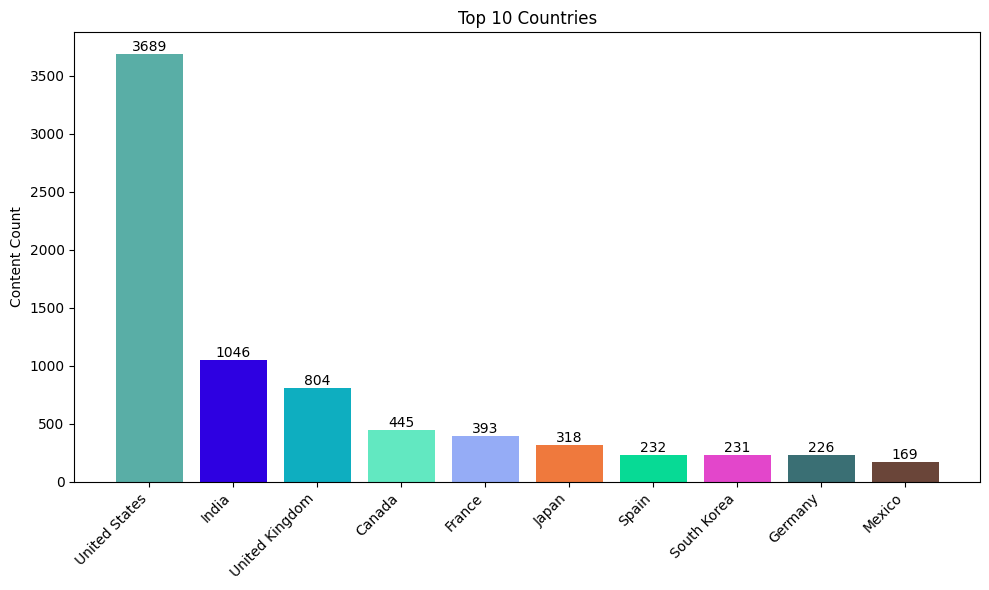

In [927]:
country_df = country_df.explode('country')
country_counts = country_df['country'].value_counts().head(10)  # Top 10 countries
#generating random colour
top = country_counts.nunique()
colors = np.random.rand(top,3)

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as desired
bars = plt.bar(country_counts.index, country_counts.values)

# Add count values on top of bars
for bar, count in zip(bars, country_counts.values):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.2, count, ha='center', va='bottom')

plt.bar(country_counts.index, country_counts.values, color=colors)

# Customize the plot
plt.ylabel('Content Count')
plt.title('Top 10 Countries')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()

# Rating Distribution

Analyze the distribution of content across different rating categories.

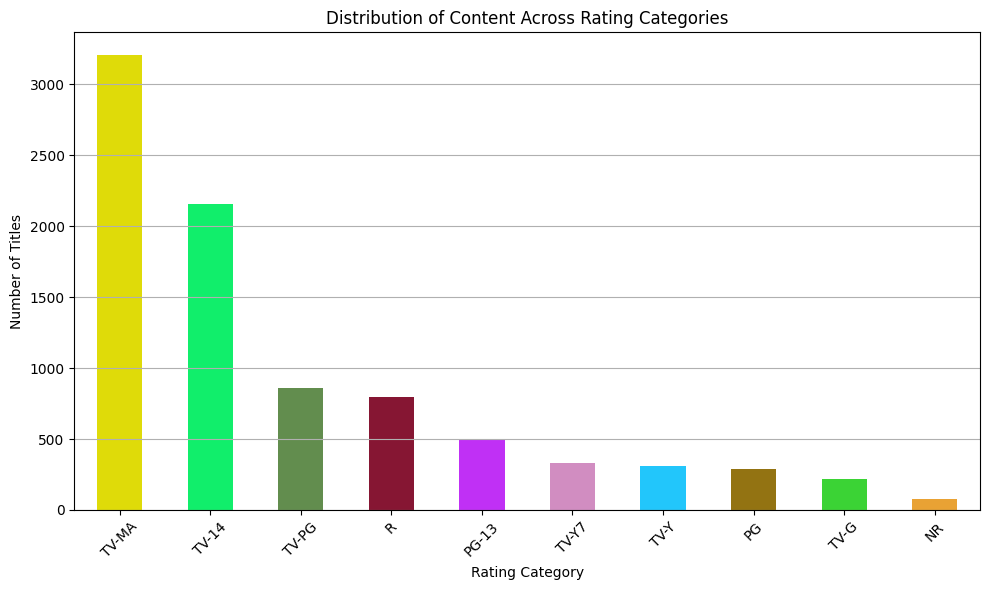

In [881]:
rating_distribution = df['rating'].value_counts().head(10)
top = rating_distribution.nunique()
#Generating Random RBG colours
colors = np.random.rand(top,3)

# Plot the distribution of content across different rating categories
plt.figure(figsize=(10, 6))
rating_distribution.plot(kind='bar', color=colors)
plt.title('Distribution of Content Across Rating Categories')
plt.xlabel('Rating Category')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Finding Outliers

Using Box plot

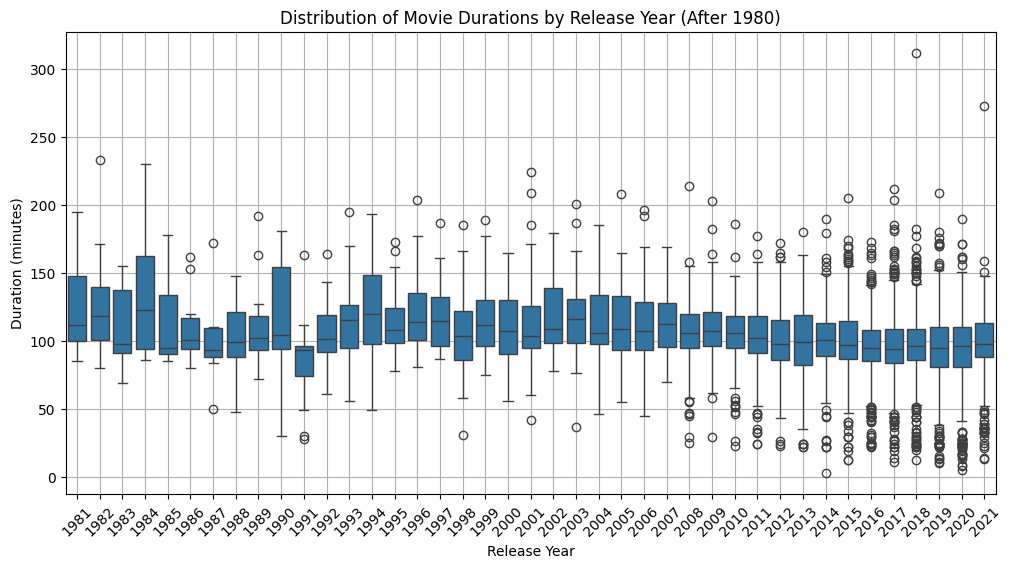

In [882]:
# Filter DataFrame for movies released after 1980
df_1980 = df[(df['type'] == 'Movie') & (df['release_year'] > 1980)]

# Plotting
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_1980, x='release_year', y='duration')
plt.title('Distribution of Movie Durations by Release Year (After 1980)')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Using Histogram for Movies ***data***

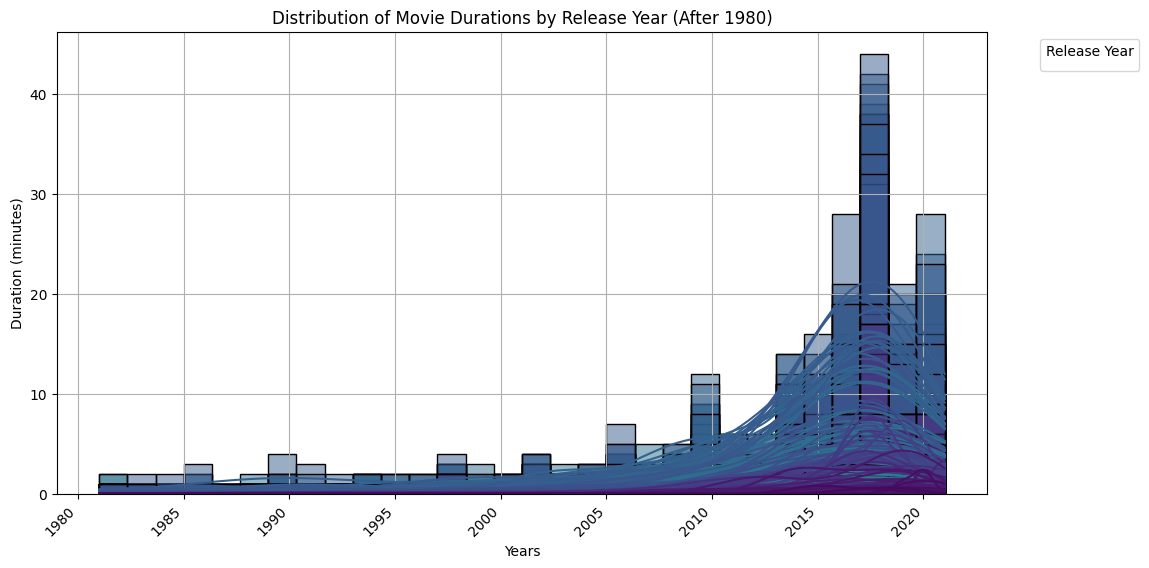

In [883]:
# Plotting
plt.figure(figsize=(12, 6))
sns.histplot(data=movie_df[movie_df['release_year']>1980], x='release_year', bins=30, hue='duration', palette='viridis', kde=True)
#sns.histplot(data=tvshow_df[tvshow_df['release_year']>1980], x='release_year', bins=30, hue='duration', palette='viridis', kde=True)

plt.title('Distribution of Movie Durations by Release Year (After 1980)')
#plt.title('Distribution of TV Shows Durations by Release Year (After 1980)')
plt.xlabel('Years')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Release Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Using Histogram for TV Show ***data***

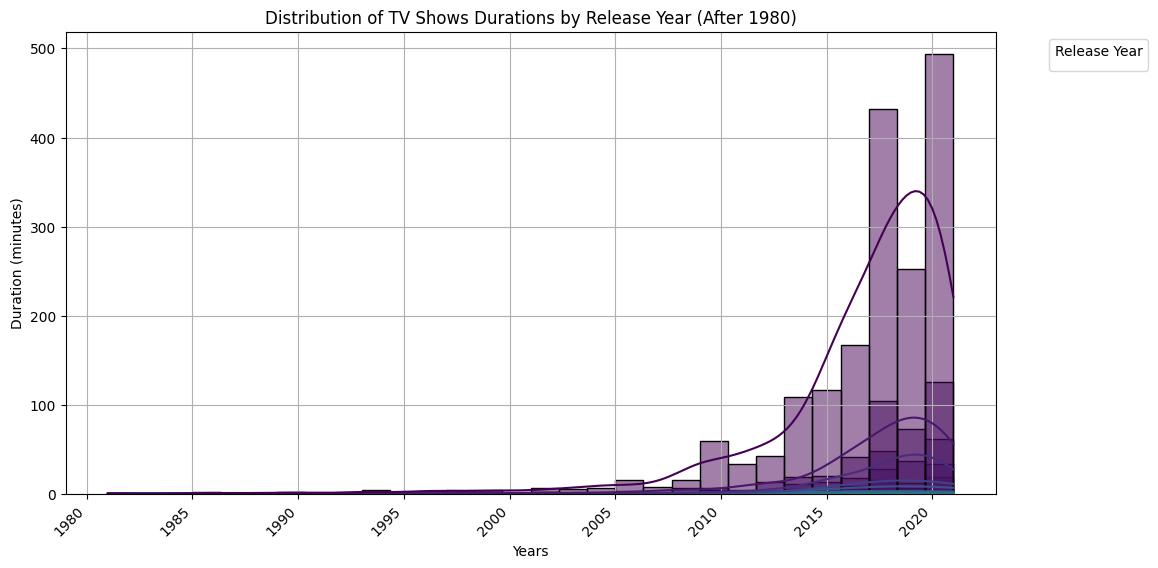

In [884]:
# Plotting
plt.figure(figsize=(12, 6))
sns.histplot(data=tvshow_df[tvshow_df['release_year']>1980], x='release_year', bins=30, hue='duration', palette='viridis', kde=True)

plt.title('Distribution of TV Shows Durations by Release Year (After 1980)')
plt.xlabel('Years')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Release Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

#Genre distribution

**Analyze how the popularity of different genres (listed_in) has changed over time. Are there genres that have become more or less prevalent in recent years?**

<Figure size 1200x800 with 0 Axes>

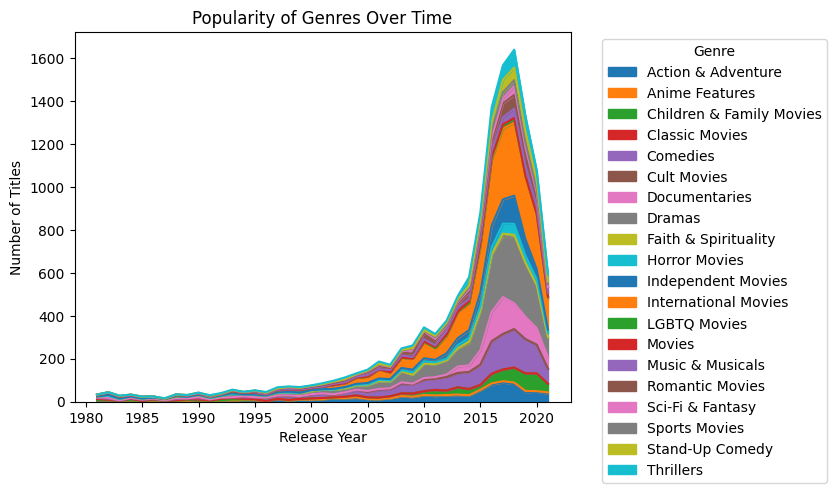

In [885]:
#GenrePlot_overall=df[df['release_year']>1980].copy()
GenrePlot_movie=movie_df[movie_df['release_year']>1980].copy()
#GenrePlot_tvshow=tvshow_df[tvshow_df['release_year']>1980].copy()

# Explode the lists into separate rows
#df_exploded_overall = GenrePlot_overall.explode('listed_in')
df_exploded_movie=GenrePlot_movie.explode('listed_in')
#df_exploded_tvshow=GenrePlot_tvshow.explode('listed_in')

# Group the data by release year and listed_in genres
#grouped_overall = df_exploded_overall.groupby(['release_year', 'listed_in']).size().reset_index(name='count')
grouped_movie = df_exploded_movie.groupby(['release_year', 'listed_in']).size().reset_index(name='count')
#grouped_tvshow = df_exploded_tvshow.groupby(['release_year', 'listed_in']).size().reset_index(name='count')



# Pivot the data to have years as rows and genres as columns
#pivot_table_overall = grouped_overall.pivot(index='release_year', columns='listed_in', values='count').fillna(0)
pivot_table_movie = grouped_movie.pivot(index='release_year', columns='listed_in', values='count').fillna(0)
#pivot_table_tvshow = grouped_tvshow.pivot(index='release_year', columns='listed_in', values='count').fillna(0)


# Plotting the trends for each genre
plt.figure(figsize=(12, 8))
#pivot_table_overall.plot(kind='area', stacked=True)
pivot_table_movie.plot(kind='area', stacked=True)
#pivot_table_tvshow.plot(kind='area', stacked=True)
plt.title('Popularity of Genres Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

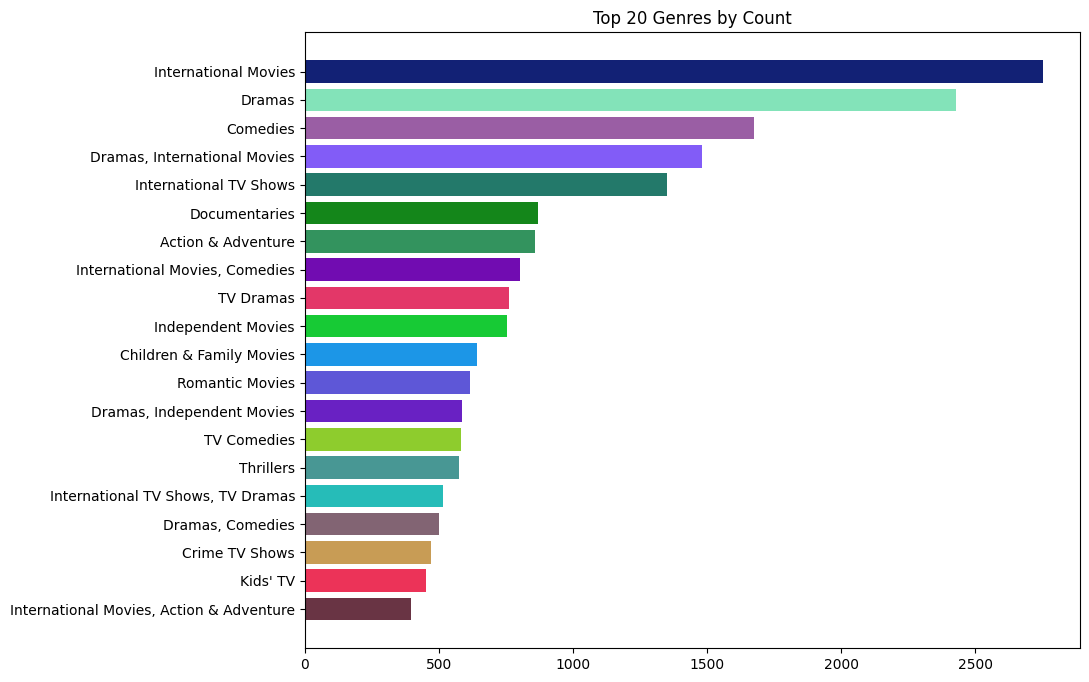

In [886]:
from itertools import combinations
df_genre = df.copy()
genre = (df_genre['listed_in'].explode().unique()).tolist()
genre_list = []

genre_list_1 = combinations(genre,1)
genre_list_2 = combinations(genre,2)
genre_list_3 = combinations(genre,3)
genre_list.extend(genre_list_1)
genre_list.extend(genre_list_2)
genre_list.extend(genre_list_3)


d = {}
for i in genre_list:
  d[tuple(i)] = df_genre['listed_in'].apply(lambda x : all(j in x for j in i)).sum()

df_pair = pd.DataFrame.from_dict(d, orient='index', columns=['Count']).reset_index()
df_pair.columns = ['Genre', 'Count']
top_20 = df_pair.sort_values(by = 'Count' ,ascending = False).head(20)
top_20['Genre'] = top_20['Genre'].apply(lambda x: ', '.join(x))

# Generate random colors for bars
colors = np.random.rand(len(top_20),3)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(top_20['Genre'], top_20['Count'], color=colors)
plt.title('Top 20 Genres by Count')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest count at the top
plt.savefig('relationBetweenGenreandCount')
plt.show()

#Genre Vs Country

In [887]:
df['country'].value_counts()

country
[United States]                             2818
[India]                                      972
[null]                                       831
[United Kingdom]                             419
[Japan]                                      245
                                            ... 
[Romania, Bulgaria, Hungary]                   1
[Uruguay, Guatemala]                           1
[France, Senegal, Belgium]                     1
[Mexico, United States, Spain, Colombia]       1
[United Arab Emirates, Jordan]                 1
Name: count, Length: 749, dtype: int64

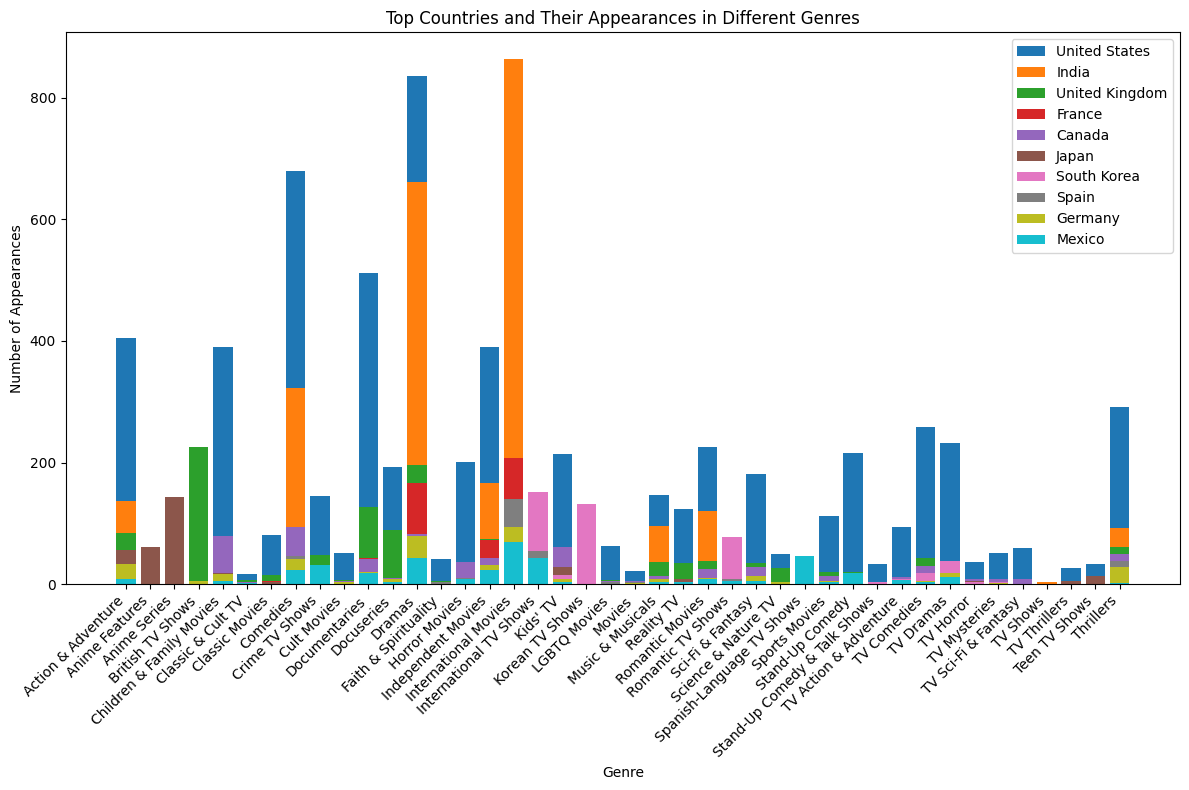

In [888]:
dffs = []

# Iterate over each row
for index, row in df.iterrows():
    # Iterate over each country in the list
    for country in row['country']:
        # Check if the country is not "unknown"
        if country != 'null':
            # Iterate over each genre
            for genre in row['listed_in']:
                # Create a DataFrame for each row and append it to the list
                dffs.append(pd.DataFrame({'country': [country], 'genre': [genre], 'type': [row['type']]}))

# Concatenate all DataFrames in the list
country_genre_content = pd.concat(dffs, ignore_index=True)

# Group the data by country and genre, and count the occurrences
country_genre_count = country_genre_content.groupby(['country', 'genre']).size().reset_index(name='count')

# Filter the top countries with the highest total appearances
top_countries = country_genre_count.groupby('country')['count'].sum().nlargest(10).index

# Plot the top countries and their appearances in different genres
plt.figure(figsize=(12, 8))
for country in top_countries:
    data = country_genre_count[country_genre_count['country'] == country]
    plt.bar(data['genre'], data['count'], label=country)

plt.title('Top Countries and Their Appearances in Different Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Appearances')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

#casting distribution

In [889]:
cast_df=country_df[['title','cast','listed_in','type']]
cast_df.dropna(inplace=True)
cast_df['List of Cast'] = cast_df['cast'].apply(convert_to_list)
cast_df['List of Genre'] = cast_df['listed_in'].apply(convert_to_list)
cast_df=cast_df.explode('List of Cast')
cast_df=cast_df.explode('List of Genre')
cast_df

<ipython-input-889-cb67e87475a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cast_df.dropna(inplace=True)
<ipython-input-889-cb67e87475a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cast_df['List of Cast'] = cast_df['cast'].apply(convert_to_list)
<ipython-input-889-cb67e87475a6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

,title,cast,listed_in,type,List of Cast,List of Genre
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...","International TV Shows, TV Dramas, TV Mysteries",TV Show,Ama Qamata,International TV Shows
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...","International TV Shows, TV Dramas, TV Mysteries",TV Show,Ama Qamata,TV Dramas
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...","International TV Shows, TV Dramas, TV Mysteries",TV Show,Ama Qamata,TV Mysteries
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...","International TV Shows, TV Dramas, TV Mysteries",TV Show,Khosi Ngema,International TV Shows
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...","International TV Shows, TV Dramas, TV Mysteries",TV Show,Khosi Ngema,TV Dramas
...,...,...,...,...,...,...
8806,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...","Dramas, International Movies, Music & Musicals",Movie,Anita Shabdish,International Movies
8806,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...","Dramas, International Movies, Music & Musicals",Movie,Anita Shabdish,Music & Musicals
8806,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...","Dramas, International Movies, Music & Musicals",Movie,Chittaranjan Tripathy,Dramas
8806,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...","Dramas, International Movies, Music & Musicals",Movie,Chittaranjan Tripathy,International Movies


In [890]:
cast_df.groupby(['List of Cast','List of Genre'])['title'].nunique().sort_values(ascending=False).head(20)
cast_member_counts = cast_df['List of Cast'].value_counts().reset_index(name='count')
top_10=cast_member_counts.head(10)
top_10

,List of Cast,count
0,Anupam Kher,127
1,Shah Rukh Khan,107
2,David Attenborough,99
3,Naseeruddin Shah,94
4,Akshay Kumar,88
5,Om Puri,87
6,Paresh Rawal,85
7,Boman Irani,84
8,Amitabh Bachchan,76
9,John Cleese,73


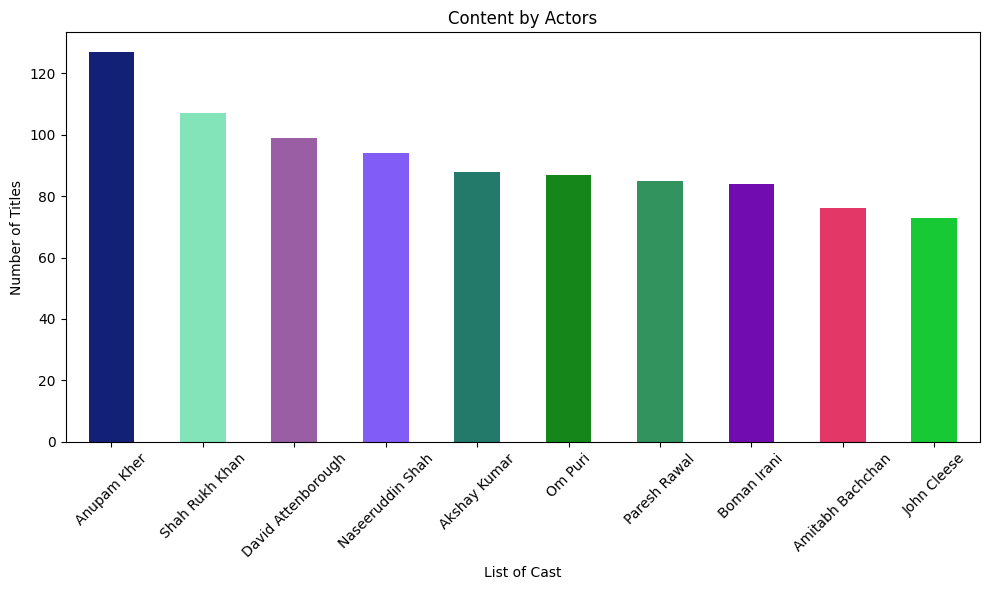

In [891]:
cast_distribution = cast_df['List of Cast'].value_counts().head(10)
#top = rating_distribution.nunique()
#Generating Random RBG colours
#colors = np.random.rand(top,3)

# Plot the distribution of content across different rating categories
plt.figure(figsize=(10, 6))
cast_distribution.plot(kind='bar', color=colors)
plt.title('Content by Actors')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
#plt.grid(axis='y')
plt.tight_layout()
plt.show()

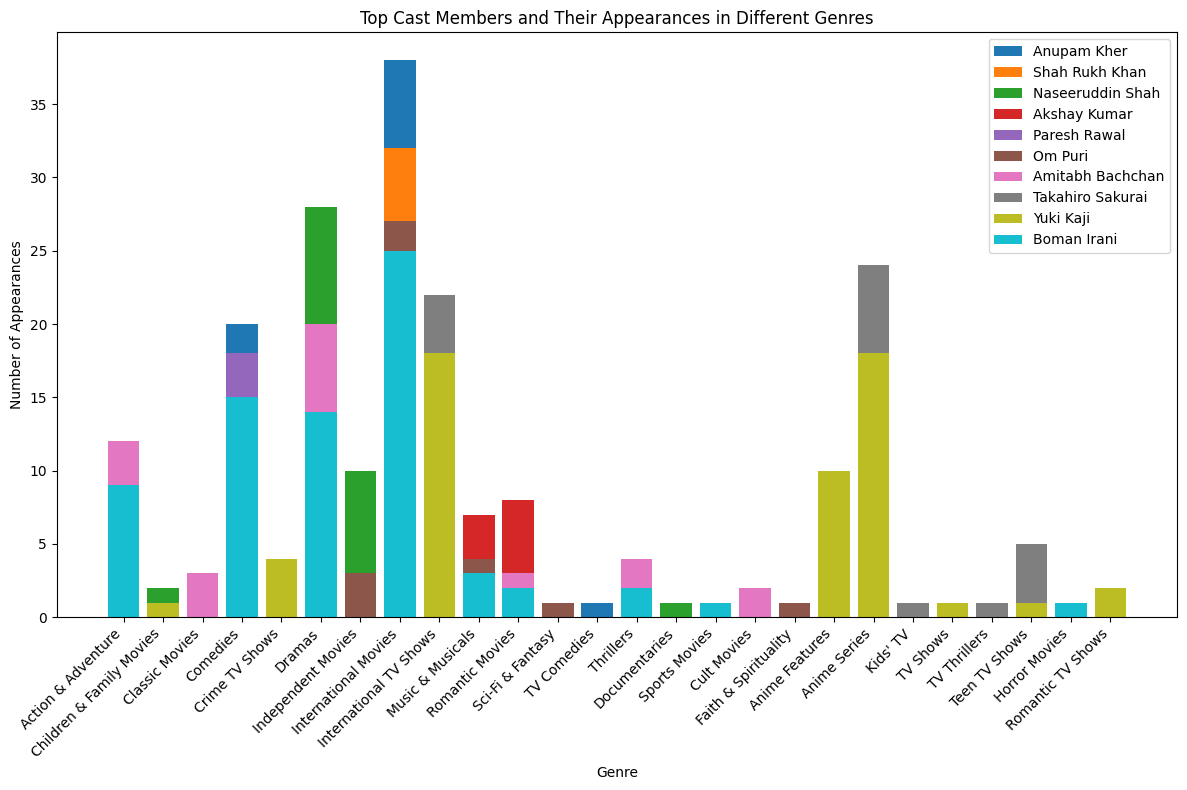

In [892]:
dfs = []

# Iterate over each row
for index, row in df.iterrows():
    # Iterate over each cast member
    for cast_member in row['cast']:
        # Check if the cast member is not "unknown"
        if cast_member != 'null':
            # Iterate over each genre
            for genre in row['listed_in']:
                # Create a DataFrame for each row and append it to the list
                dfs.append(pd.DataFrame({'cast': [cast_member], 'genre': [genre], 'type': [row['type']]}))

# Concatenate all DataFrames in the list
cast_genre_content = pd.concat(dfs, ignore_index=True)

# Group the data by cast member and genre, and count the occurrences
cast_genre_count = cast_genre_content.groupby(['cast', 'genre']).size().reset_index(name='count')

# Filter the top cast members with the highest total appearances
top_cast_members = cast_genre_count.groupby('cast')['count'].sum().nlargest(10).index

# Plot the top cast members and their appearances in different genres
plt.figure(figsize=(12, 8))
for cast_member in top_cast_members:
    data = cast_genre_count[cast_genre_count['cast'] == cast_member]
    plt.bar(data['genre'], data['count'], label=cast_member)

plt.title('Top Cast Members and Their Appearances in Different Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Appearances')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

#Director Analysis and Distribution

In [893]:
director=director_df[['title','director','listed_in','type']]
director.dropna(inplace=True)
director['List of director'] = director['director'].apply(convert_to_list)
director['List of Genre'] = director['listed_in'].apply(convert_to_list)
director=director.explode('List of director')
director=director.explode('List of Genre')
director

<ipython-input-893-5be7f8a8cb5c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  director.dropna(inplace=True)
<ipython-input-893-5be7f8a8cb5c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  director['List of director'] = director['director'].apply(convert_to_list)
<ipython-input-893-5be7f8a8cb5c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

,title,director,listed_in,type,List of director,List of Genre
0,Dick Johnson Is Dead,Kirsten Johnson,Documentaries,Movie,Kirsten Johnson,Documentaries
2,Ganglands,Julien Leclercq,"Crime TV Shows, International TV Shows, TV Act...",TV Show,Julien Leclercq,Crime TV Shows
2,Ganglands,Julien Leclercq,"Crime TV Shows, International TV Shows, TV Act...",TV Show,Julien Leclercq,International TV Shows
2,Ganglands,Julien Leclercq,"Crime TV Shows, International TV Shows, TV Act...",TV Show,Julien Leclercq,TV Action & Adventure
5,Midnight Mass,Mike Flanagan,"TV Dramas, TV Horror, TV Mysteries",TV Show,Mike Flanagan,TV Dramas
...,...,...,...,...,...,...
8805,Zoom,Peter Hewitt,"Children & Family Movies, Comedies",Movie,Peter Hewitt,Children & Family Movies
8805,Zoom,Peter Hewitt,"Children & Family Movies, Comedies",Movie,Peter Hewitt,Comedies
8806,Zubaan,Mozez Singh,"Dramas, International Movies, Music & Musicals",Movie,Mozez Singh,Dramas
8806,Zubaan,Mozez Singh,"Dramas, International Movies, Music & Musicals",Movie,Mozez Singh,International Movies


In [894]:
director.groupby(['List of director','List of Genre'])['title'].nunique().sort_values(ascending=False)
director_counts = director['List of director'].value_counts().reset_index(name='count')
top_10 = director_counts.iloc[1:].head(10)
top_10

,List of director,count
1,Youssef Chahine,33
2,Suhas Kadav,29
3,David Dhawan,27
4,Martin Scorsese,25
5,Yılmaz Erdoğan,24
6,Rajiv Chilaka,24
7,Steven Spielberg,23
8,Anurag Kashyap,23
9,Mae Czarina Cruz,21
10,S.S. Rajamouli,21


In [895]:
x=top_10[top_10['List of director']!='null'].value_counts().index[1:11]
x

MultiIndex([(    'David Dhawan', 27),
            ('Mae Czarina Cruz', 21),
            ( 'Martin Scorsese', 25),
            (   'Rajiv Chilaka', 24),
            (  'S.S. Rajamouli', 21),
            ('Steven Spielberg', 23),
            (     'Suhas Kadav', 29),
            ( 'Youssef Chahine', 33),
            (  'Yılmaz Erdoğan', 24)],
           names=['List of director', 'count'])

<ipython-input-896-da9ea64a3b65>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='List of director', data=top_10, palette='mako')


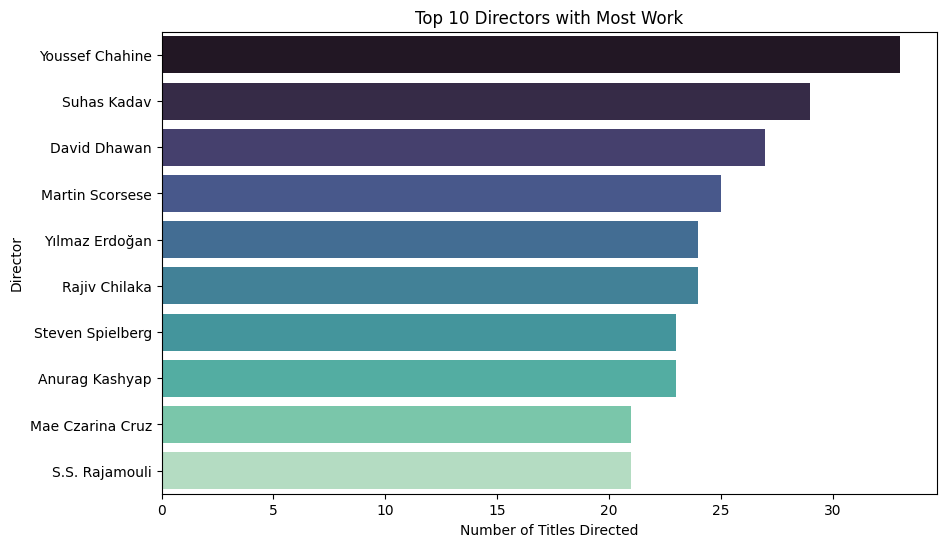

In [896]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='List of director', data=top_10, palette='mako')
plt.title('Top 10 Directors with Most Work')
plt.xlabel('Number of Titles Directed')
plt.ylabel('Director')
plt.show()


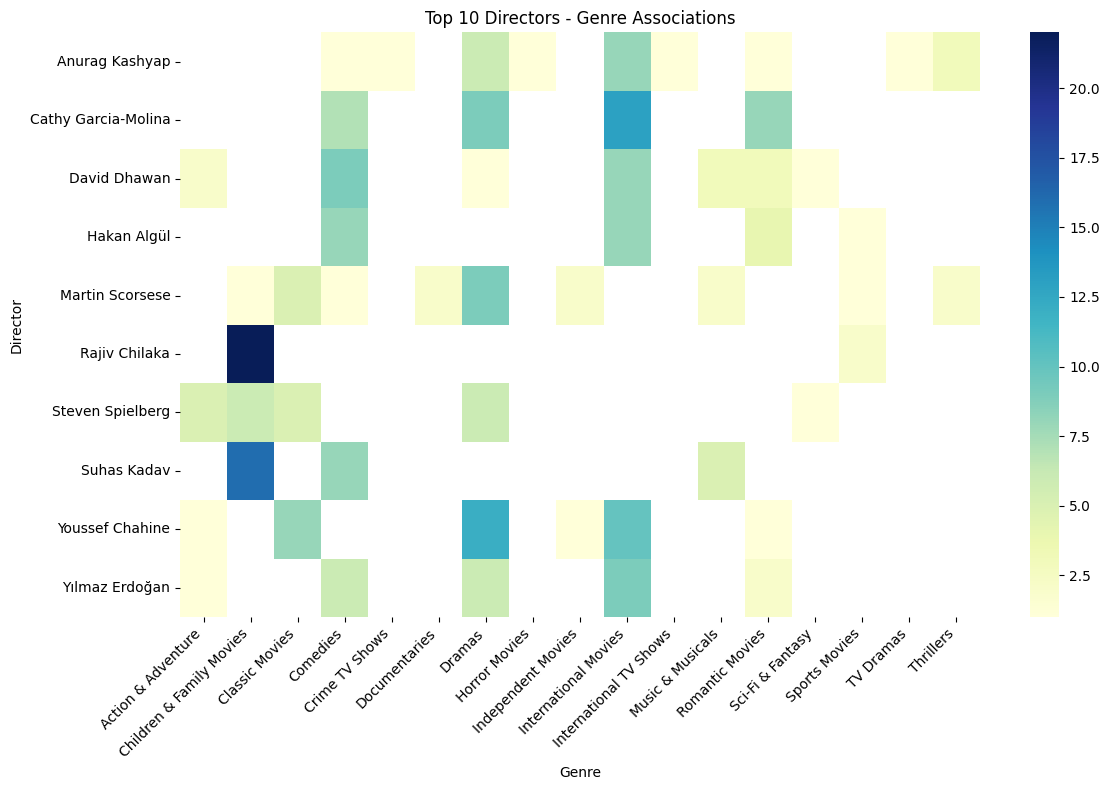

In [897]:
director_genre_count = director.groupby(['List of director', 'List of Genre']).size().reset_index(name='count')

# Get the top 10 directors
top_directors = director_genre_count.groupby('List of director')['count'].sum().nlargest(10).index

# Filter the DataFrame to include only the top 10 directors
director_genre_count_top10 = director_genre_count[director_genre_count['List of director'].isin(top_directors)]

# Pivot the DataFrame to have directors as rows, genres as columns, and count as values
director_genre_pivot = director_genre_count_top10.pivot(index='List of director', columns='List of Genre', values='count')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(director_genre_pivot, cmap='YlGnBu', linewidths=0.)
plt.title('Top 10 Directors - Genre Associations')
plt.xlabel('Genre')
plt.ylabel('Director')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Title Analysis

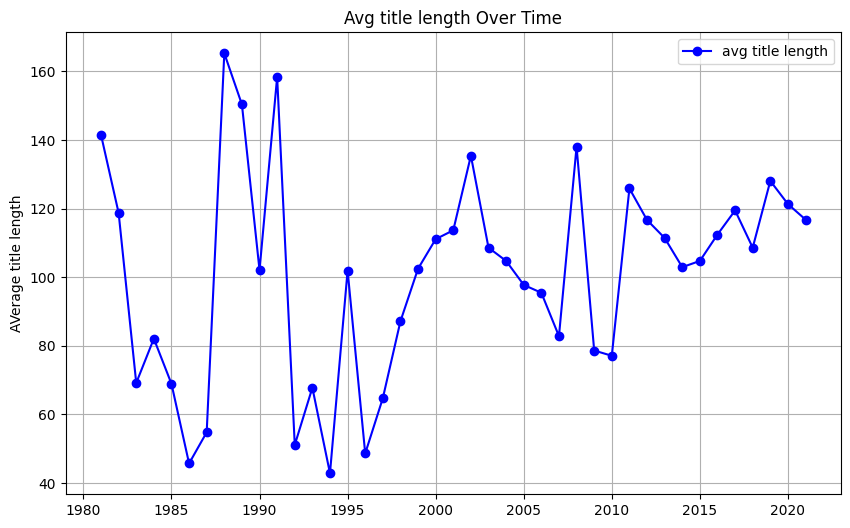

In [898]:
df_title = df.copy()
df_title = df_title[df_title['release_year'] > 1980]
ans = df_title.groupby('release_year')['title'].apply(lambda x : x.str.len().var())


plt.figure(figsize=(10, 6))
plt.plot(ans.index, ans.values, marker='o', color='b', label='avg title length')
plt.title('Avg title length Over Time')
plt.ylabel('AVerage title length')
plt.legend()
plt.grid(True)
plt.show()

#Netflix orginal Content or not

In [899]:
df_content = df.copy()
content_mapping = {
    True : 'Netflix original content',
    False : 'Licensed content'
}
df_content['content_type'] = df_content.apply(lambda x: content_mapping[x['date_added'].year == x['release_year']], axis=1)

Text(0, 0.5, '')

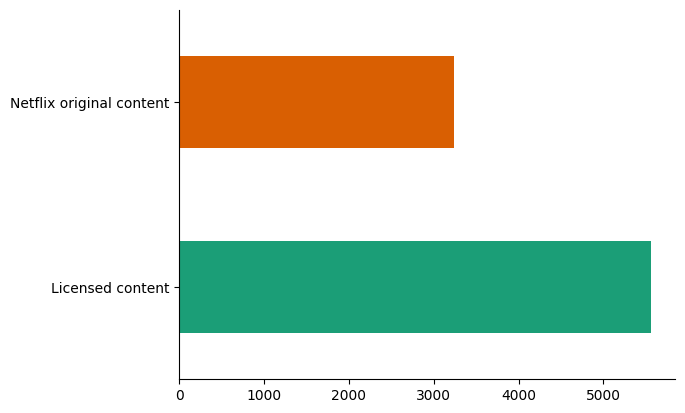

In [900]:
df_content.groupby('content_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.ylabel('')

In [901]:
# Filter out rows with null ratings
df_content_filtered = df_content[df_content['rating'].apply(lambda x: 'null' not in x)]

# Group the filtered data by content type and rating, and count the occurrences
rating_content_counts = df_content_filtered.groupby(['content_type', 'rating']).size().unstack()

rating_content_counts


rating,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
content_type,,,,,,,,,,,,,,
Licensed content,36.0,3.0,63.0,237.0,420.0,689.0,1495.0,128.0,1555.0,577.0,162.0,188.0,5.0,3.0
Netflix original content,5.0,NaN,17.0,50.0,70.0,110.0,665.0,92.0,1652.0,286.0,145.0,146.0,1.0,NaN


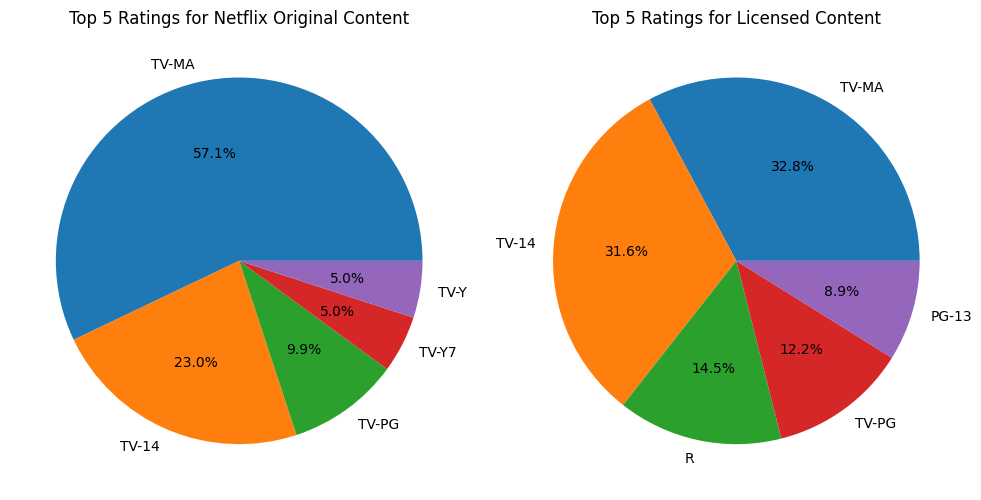

In [902]:
# Get the top 5 ratings for each content type
top_ratings_original = df_content_filtered[df_content_filtered['content_type'] == 'Netflix original content']['rating'].explode().value_counts().nlargest(5)
top_ratings_licensed = df_content_filtered[df_content_filtered['content_type'] == 'Licensed content']['rating'].explode().value_counts().nlargest(5)

# Plot pie chart for Netflix original content
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(top_ratings_original, labels=top_ratings_original.index, autopct='%1.1f%%')
plt.title('Top 5 Ratings for Netflix Original Content')

# Plot pie chart for Licensed content
plt.subplot(1, 2, 2)
plt.pie(top_ratings_licensed, labels=top_ratings_licensed.index, autopct='%1.1f%%')
plt.title('Top 5 Ratings for Licensed Content')

plt.tight_layout()
plt.show()


# Audience Guidence

In [903]:
rating_to_audience_mapping = {
    'PG-13': 'Teens',
    'TV-MA': 'Mature Audience',
    'PG': 'Teens',
    'TV-14': 'Teens',
    'TV-PG': 'Parental Guidance',
    'TV-Y': 'General Audience',
    'TV-Y7': 'Teens',
    'R': 'Mature Audience',
    'TV-G': 'General Audience',
    'G': 'General Audience',
    'NC-17': 'Mature Audience',
    'unknown': 'Parental Guidance',
    'NR': 'Mature Audience',
    'TV-Y7-FV': 'Teens',
    'UR': 'Mature Guidance'
}

# Add a new column 'audience_category' based on the mapping
df_content['audience_category'] = df_content['rating'].map(rating_to_audience_mapping)

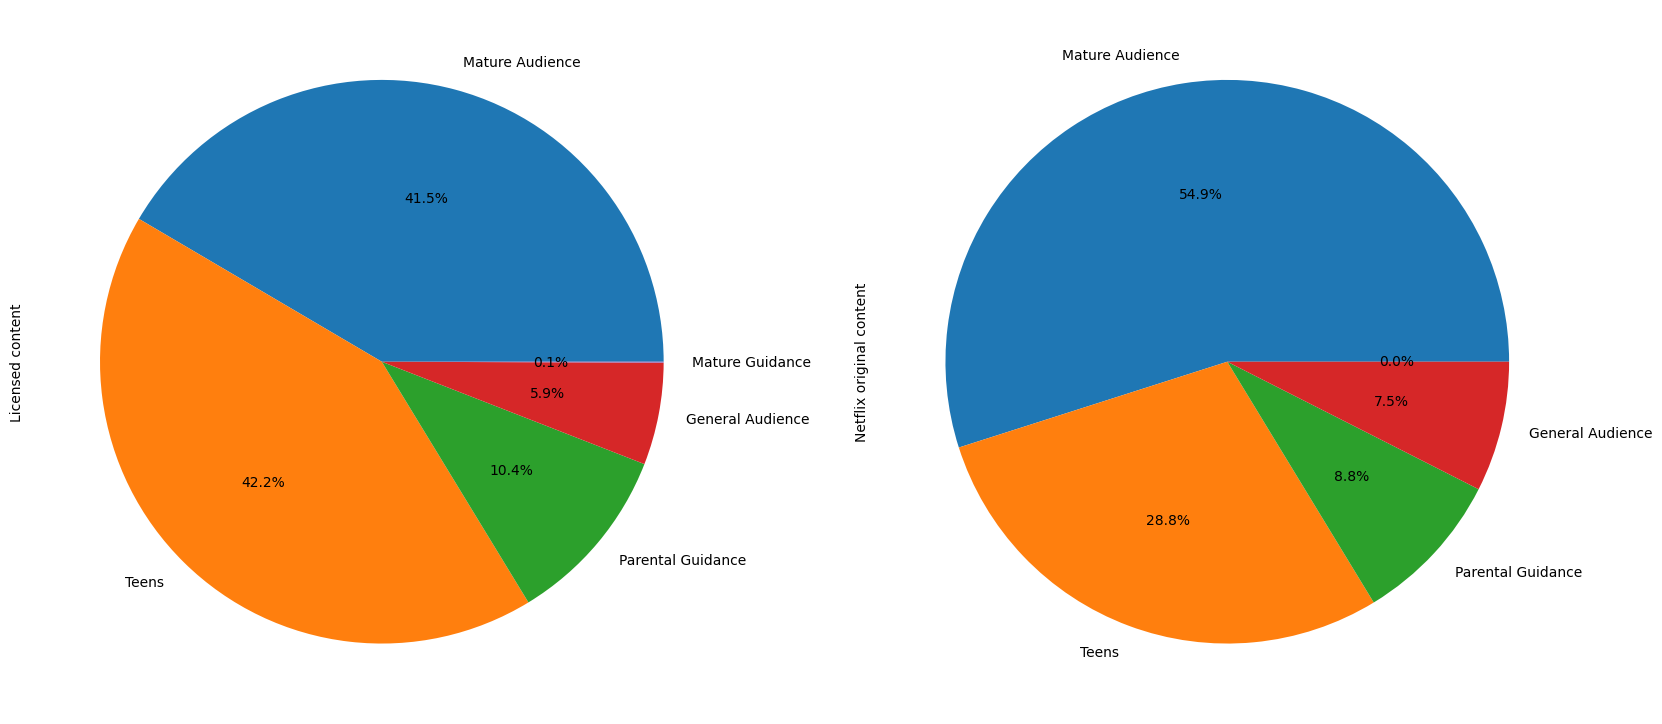

In [904]:
grouped = df_content.groupby(['audience_category', 'content_type']).size().unstack()

# Sort the DataFrame by the count of 'Netflix original content'
grouped_sorted = grouped.sort_values(by='Netflix original content', ascending=False)

# Plot the pie chart with sorted data
grouped_sorted.plot(kind='pie', subplots=True, legend=False, autopct='%1.1f%%', figsize=(20, 10), layout=(1, 2))

plt.show()

<ipython-input-905-73d4ceed97bc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_content, x='release_year', y='audience_category', inner='box', palette='Dark2')


Text(0.5, 0, '')

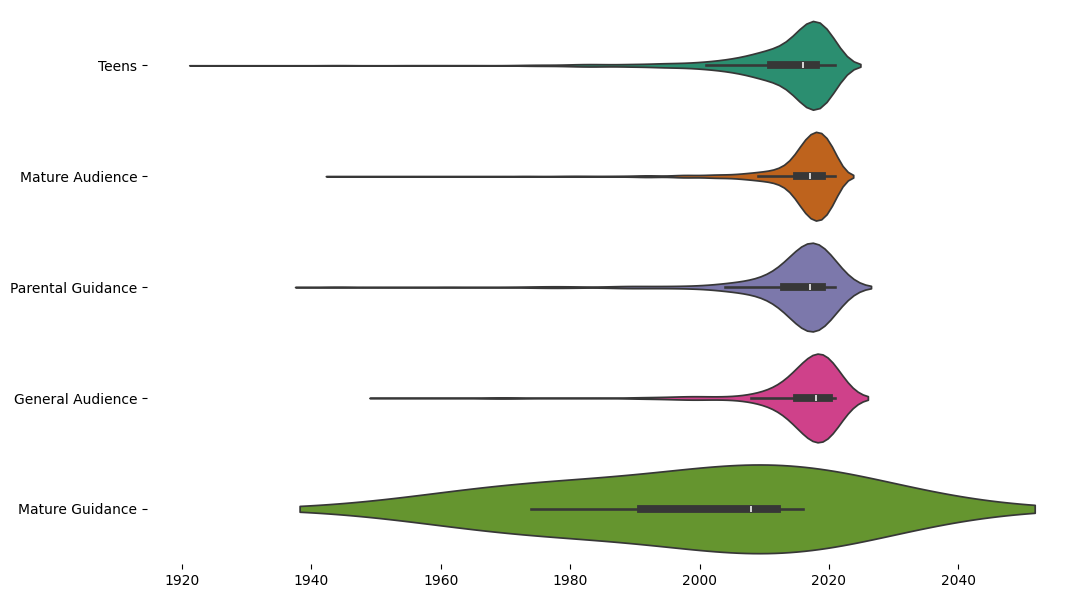

In [905]:
figsize = (12, 1.2 * len(df_content['audience_category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_content, x='release_year', y='audience_category', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.ylabel('')
plt.xlabel('')

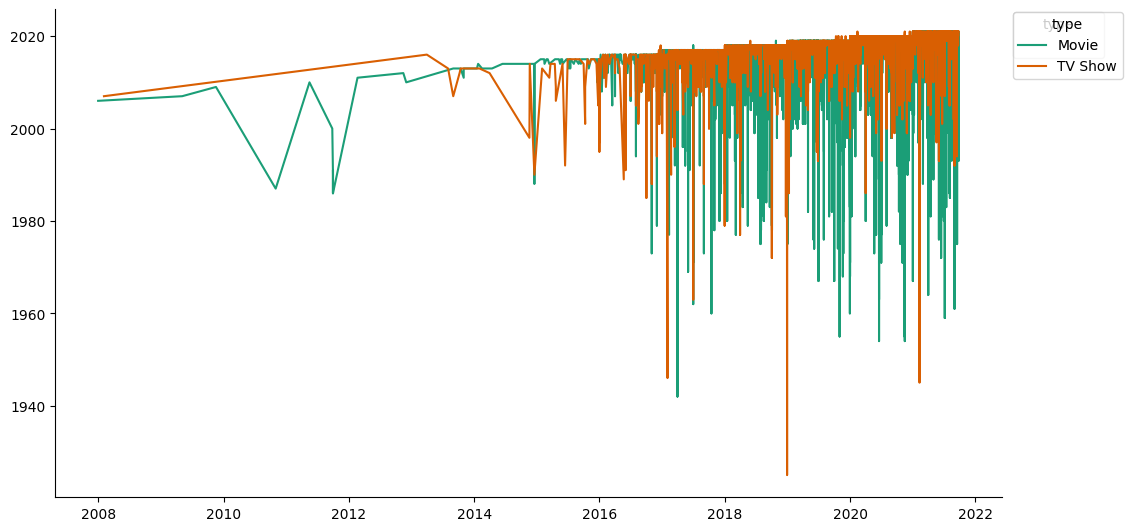

In [906]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date_added']
  ys = series['release_year']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('date_added', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('type')):
  _plot_series(series, series_name, i)
  fig.legend(title='type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)


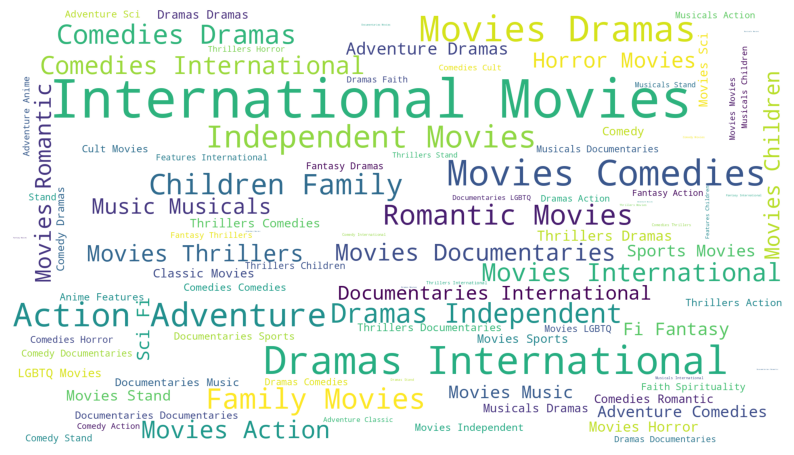

In [907]:
plt.subplots(figsize = (10,6))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(wordcloud_df[wordcloud_df['type'] == 'Movie']['listed_in']))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('category.png')
plt.show()

## Inferences and Conclusion

We have drawn many interesting inferences from the dataset Netflix titles; here’s a summary of the few of them:

1. The most content type on Netflix is `Movies`.

2. The country by the amount of the produces content is the `United States`,

3. The most popular director on Netflix , with the most titles, is `Rajiv Chilaka`.

4. International Movies is a genre that is mostly in Netflix.

5. largest count of Netflix content is made with a `TV-MA` rating.

6. The most popular actor on Netflix movie, based on the number of titles, is `Anupam Kher`.

It's clear that Netflix has grown over the years. We can see it from the data that the company took certain approaches in their marketing strategy to break into new markets around the world.

## Recommendations

1. Netflix should try to increase the number of TV shows by reaching out to customers and understanding what is popular in order to increase it's TV Shows viewership.
2. The number of movies released drastically went down in 2020. Netflix should partner with Production houses and ramp up the production and making of movies as soon as possible.
3. Netflix should focus on genres Action & Adventure, Comedy, Documentaries and Dramas because they are the ones with most viewership and will likely bring more profits for the company.
4. The most popular markets for the company are `United States` and `India` however `United States` is vastly ahead of `India` in terms of number of users so, the company should try to penetrate deeper into Indian market by providing local language content in a very personalized way to each state of India. In the US, it should look for genres where there has not been much success and try to promote them as well.
5. Also, according to the data, the best time to release movies is between `week 1` and `week 15`. As for the TV shows it is the month of `December` and `July`.

All the above recommendations are some of the possible ways in which Netflix can improve its business and increase its viewership. By implementing them, Netflix can strengthen its position in the streaming industry and sustain long term growth.   